In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

##I. Supervised Learning - Classification

In [ ]:
batch_size = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 26421880/26421880 [00:06<00:00, 3922517.38it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201966.70it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3724724.90it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5727394.43it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
class FashionMNISTClassifier(nn.Module):
    def __init__(self):
        super(FashionMNISTClassifier, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
model = FashionMNISTClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/10], Loss: 0.4992
Epoch [2/10], Loss: 0.3716
Epoch [3/10], Loss: 0.3335
Epoch [4/10], Loss: 0.3070
Epoch [5/10], Loss: 0.2857
Epoch [6/10], Loss: 0.2688
Epoch [7/10], Loss: 0.2543
Epoch [8/10], Loss: 0.2420
Epoch [9/10], Loss: 0.2280
Epoch [10/10], Loss: 0.2195


In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {100 * correct / total:.2f}%")

Accuracy on test set: 88.35%


GroundTruth:  Ankle boot Pullover Trouser Trouser Shirt Trouser Coat Shirt
Predicted:    Ankle boot Pullover Trouser Trouser Shirt Trouser Coat Shirt


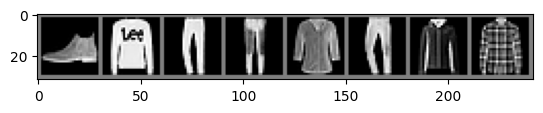

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.utils import make_grid


# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Class names in the Fashion MNIST dataset
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Get a batch of test data
dataiter = iter(test_loader)
images, labels = next(dataiter, "end")

# Make predictions on the test images
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Display the images along with the predicted and actual labels
print("GroundTruth: ", " ".join(f"{classes[labels[j]]}" for j in range(8)))
print("Predicted:   ", " ".join(f"{classes[predicted[j]]}" for j in range(8)))

# Show the test images
imshow(make_grid(images[:8]))  # Display 8 images in a grid

##II. Unsupervised Learning - Dimensionality Reduction

In [ ]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [ ]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()

# Download the FashionMNIST Dataset
dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=tensor_transform)

# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)

In [ ]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9),
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 9 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
# Model Initialization
model = AE()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-8)

Epoch [1/10], Loss: 0.8111
Epoch [2/10], Loss: 0.9027
Epoch [3/10], Loss: 0.9899
Epoch [4/10], Loss: 1.0719
Epoch [5/10], Loss: 1.1501
Epoch [6/10], Loss: 1.2200
Epoch [7/10], Loss: 1.2783
Epoch [8/10], Loss: 1.3328
Epoch [9/10], Loss: 1.3848
Epoch [10/10], Loss: 1.4346


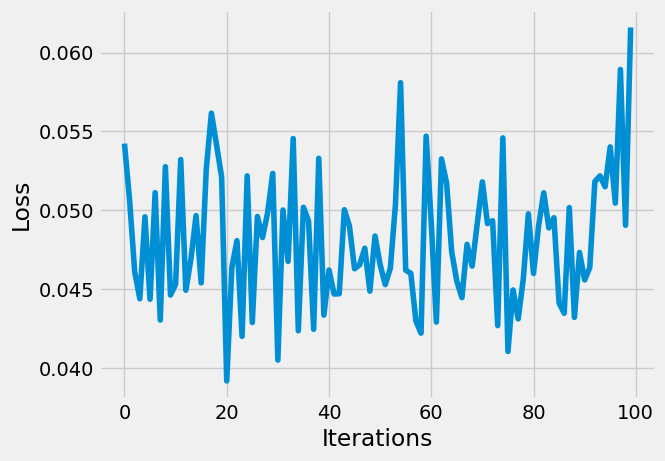

In [ ]:
epochs = 10
outputs = []
losses = []
for epoch in range(epochs):
    for image, _ in loader:
        # Reshaping the image to (-1, 784)
        image = image.reshape(-1, 28 * 28)

        # Output of Autoencoder
        reconstructed = model(image)

        # Calculating the loss function
        loss = loss_function(reconstructed, image)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()  # Convert loss to scalar value

        # Storing the losses in a list for plotting
        losses.append(loss.item())
    outputs.append((epochs, image, reconstructed))
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(loader):.4f}")

# Defining the Plot Style
plt.style.use("fivethirtyeight")
plt.xlabel("Iterations")
plt.ylabel("Loss")

# Plotting the last 100 values
plt.plot(losses[-100:])
plt.show()

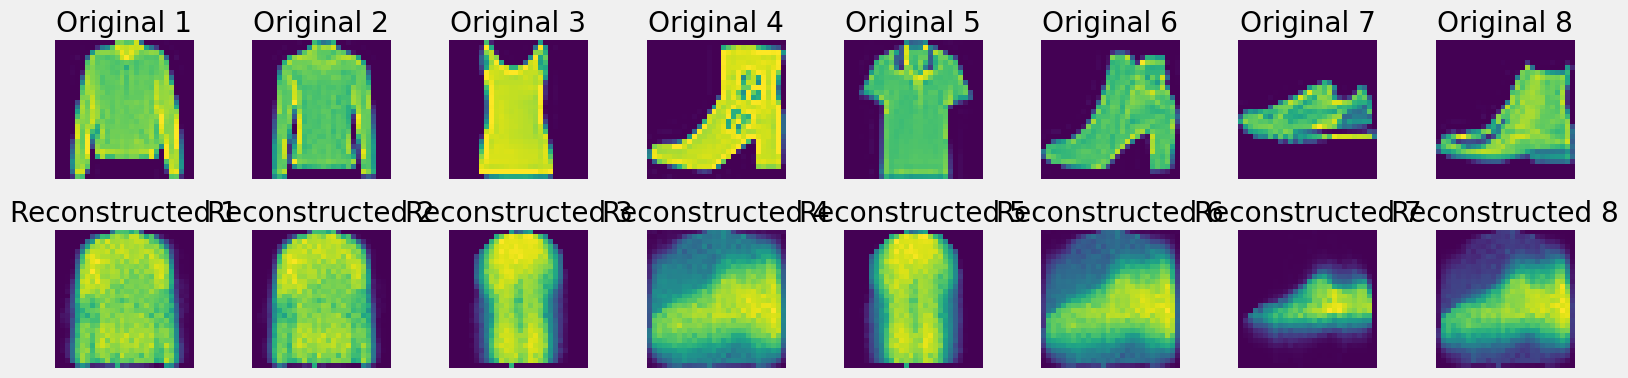

In [ ]:
import matplotlib.pyplot as plt
import torch

# Number of images
num_images = 8

model.eval()

data_iter = iter(loader)
images, _ = next(data_iter)

# Forward pass: Get the reconstructed images from the model
with torch.no_grad():
    reconstructed = model(images.view(-1, 28 * 28))  # Flatten for the model's input
    reconstructed = reconstructed.view(-1, 1, 28, 28)  # Reshape back to 28x28 for visualization

# Create subplots with 2 rows: one for original and one for reconstructed images
fig, axes = plt.subplots(2, num_images, figsize=(num_images * 2, 4))

# Plot original images in the first row
for i in range(num_images):
    item = images[i].reshape(28, 28)  # Reshape for plotting
    axes[0, i].imshow(item)
    axes[0, i].set_title(f"Original {i+1}")
    axes[0, i].axis("off")  # Hide axis for clean visualization

# Plot reconstructed images in the second row
for i in range(num_images):
    recon_item = reconstructed[i].reshape(28, 28)  # Reshape for plotting
    axes[1, i].imshow(recon_item.detach().numpy())
    axes[1, i].set_title(f"Reconstructed {i+1}")
    axes[1, i].axis("off")  # Hide axis for clean visualization

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

100%|██████████| 26421880/26421880 [00:07<00:00, 3475259.95it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 172131.94it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3205920.82it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5425195.22it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch [1/10], Loss: 0.6862
Epoch [2/10], Loss: 0.6816
Epoch [3/10], Loss: 0.6816
Epoch [4/10], Loss: 0.6816
Epoch [5/10], Loss: 0.6816
Epoch [6/10], Loss: 0.6816
Epoch [7/10], Loss: 0.6816
Epoch [8/10], Loss: 0.6816
Epoch [9/10], Loss: 0.6816
Epoch [10/10], Loss: 0.6816


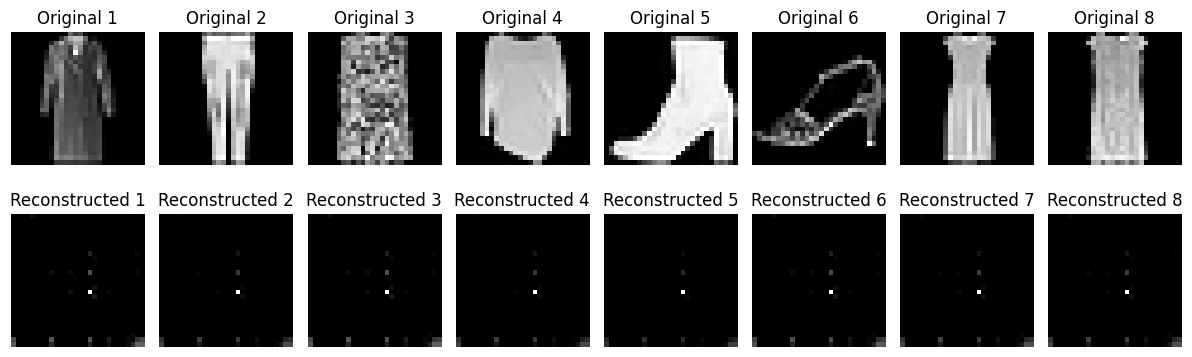

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Transform: Normalizes images and converts to tensor
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download Fashion MNIST dataset
train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)


# Define the Convolutional Autoencoder
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # [batch, 1, 28, 28] -> [batch, 16, 14, 14]
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # [batch, 16, 14, 14] -> [batch, 32, 7, 7]
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=7),  # [batch, 32, 7, 7] -> [batch, 64, 1, 1]
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=7),  # [batch, 64, 1, 1] -> [batch, 32, 7, 7]
            nn.ReLU(),
            nn.ConvTranspose2d(
                32, 16, kernel_size=3, stride=2, padding=1, output_padding=1
            ),  # [batch, 32, 7, 7] -> [batch, 16, 14, 14]
            nn.ReLU(),
            nn.ConvTranspose2d(
                16, 1, kernel_size=3, stride=2, padding=1, output_padding=1
            ),  # [batch, 16, 14, 14] -> [batch, 1, 28, 28]
            nn.Sigmoid(),  # To get output between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# Initialize the model, loss function and optimizer
model = ConvAutoencoder()
criterion = nn.MSELoss()  # Reconstruction loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for images, _ in train_loader:
        # Move images to the appropriate shape [batch_size, 1, 28, 28]
        images = images.view(-1, 1, 28, 28)

        # Forward pass
        reconstructed = model(images)
        loss = criterion(reconstructed, images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Visualizing original and reconstructed images
model.eval()
data_iter = iter(train_loader)
images, _ = next(data_iter)

with torch.no_grad():
    reconstructed = model(images)

# Display original and reconstructed images side by side
fig, axes = plt.subplots(2, 8, figsize=(12, 4))

for i in range(8):
    # Original images
    axes[0, i].imshow(images[i].view(28, 28).cpu().numpy(), cmap="gray")
    axes[0, i].set_title(f"Original {i+1}")
    axes[0, i].axis("off")

    # Reconstructed images
    axes[1, i].imshow(reconstructed[i].view(28, 28).cpu().numpy(), cmap="gray")
    axes[1, i].set_title(f"Reconstructed {i+1}")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()